<a href="https://colab.research.google.com/github/RokelisK123/gilusis/blob/main/Fish_datacsv_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All required imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Only used to split the dataset
from collections import Counter

# Importing provided Perceptron class

In [2]:
class Perceptron:

    def __init__(self, weights, learning_rate=0.1):
        self.weights = np.array(weights)
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        return 0 if x < 0 else 1

    def __call__(self, in_data):
        weighted_sum = np.dot(self.weights, in_data)
        return Perceptron.unit_step_function(weighted_sum)

    def fit(self, target_result, calculated_result, in_data):
        in_data = np.array(in_data)
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(self(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation


    def predict(self, data):
        predictions = []
        for index in range(len(data)):
            predictions.append(int(round(self(data[index]))))
        return predictions

# Importing dataset (fish_data.csv)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/RokelisK123/gilusis/refs/heads/main/fish_data.csv', sep=',')

print(data)

# Remove w_l_ratio because it's not used here
data.drop(columns=["w_l_ratio"], inplace=True)
data

                    species  length  weight  w_l_ratio
0        Anabas testudineus   10.66    3.45       0.32
1        Anabas testudineus    6.91    3.27       0.47
2        Anabas testudineus    8.38    3.46       0.41
3        Anabas testudineus    7.57    3.36       0.44
4        Anabas testudineus   10.83    3.38       0.31
...                     ...     ...     ...        ...
4075  Sillaginopsis panijus   30.56    6.12       0.20
4076  Sillaginopsis panijus   29.66    6.11       0.21
4077  Sillaginopsis panijus   32.81    6.25       0.19
4078  Sillaginopsis panijus   29.78    6.11       0.21
4079  Sillaginopsis panijus   31.62    6.14       0.19

[4080 rows x 4 columns]


,species,length,weight
0,Anabas testudineus,10.66,3.45
1,Anabas testudineus,6.91,3.27
2,Anabas testudineus,8.38,3.46
3,Anabas testudineus,7.57,3.36
4,Anabas testudineus,10.83,3.38
...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12
4076,Sillaginopsis panijus,29.66,6.11
4077,Sillaginopsis panijus,32.81,6.25
4078,Sillaginopsis panijus,29.78,6.11


# Check what labels we have and pick out 2 to use

In [4]:
print(data["species"].unique())

['Anabas testudineus' 'Coilia dussumieri' 'Otolithoides biauritus'
 'Otolithoides pama' 'Pethia conchonius' 'Polynemus paradiseus'
 'Puntius lateristriga' 'Setipinna taty' 'Sillaginopsis panijus']


Filter out only the required labels

In [5]:
label1 = data["species"].unique()[2]
label2 = data["species"].unique()[5]
data = data[data["species"].isin([label1, label2])]

In [6]:
data

,species,length,weight
891,Otolithoides biauritus,20.07,3.18
892,Otolithoides biauritus,17.21,3.23
893,Otolithoides biauritus,16.82,3.08
894,Otolithoides biauritus,17.72,3.18
895,Otolithoides biauritus,21.43,3.30
...,...,...,...
2722,Polynemus paradiseus,11.61,4.02
2723,Polynemus paradiseus,12.96,4.08
2724,Polynemus paradiseus,9.75,4.04
2725,Polynemus paradiseus,11.49,3.96


Plot species

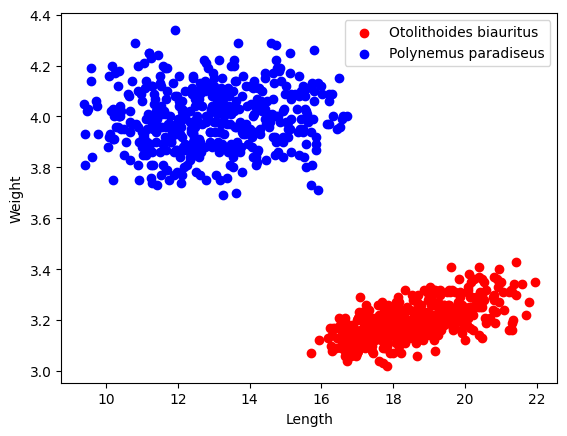

In [7]:
plt.scatter(data[data["species"]==label1]["length"], data[data["species"]==label1]["weight"], color="red", label=label1)
plt.scatter(data[data["species"]==label2]["length"], data[data["species"]==label2]["weight"], color="blue", label=label2)
plt.legend()
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

# Replacing string with int (required for perceptron)

In [8]:
data["species"].replace({label1 : 0, label2 : 1}, inplace=True)
data

<ipython-input-8-ef9b7bcafc69>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["species"].replace({label1 : 0, label2 : 1}, inplace=True)
<ipython-input-8-ef9b7bcafc69>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["species"].replace({label1 : 0, label2 : 1}, inplace=True)
<ipython-inp

,species,length,weight
891,0,20.07,3.18
892,0,17.21,3.23
893,0,16.82,3.08
894,0,17.72,3.18
895,0,21.43,3.30
...,...,...,...
2722,1,11.61,4.02
2723,1,12.96,4.08
2724,1,9.75,4.04
2725,1,11.49,3.96


# Split dataset into training and testing

In [9]:
train, test = train_test_split(data, test_size=0.2, random_state=42, stratify=data["species"])
print(f"{len(train)} rows ({len(train)/len(data)*100:.2f}%) for training\n{len(test):} rows ({len(test)/len(data)*100:.2f}%) for testing.")

train_x = train.copy()
train_y = np.array(train_x.pop("species"))
train_x = np.array(train_x)

test_x = test.copy()
test_y = np.array(test_x.pop("species"))
test_x = np.array(test_x)

740 rows (79.91%) for training
186 rows (20.09%) for testing.


# Create perceptron and train it

In [10]:
perceptron = Perceptron(weights=[0.1, 0.1], learning_rate=0.1)
for index in range(len(train_x[:,:])):
    perceptron.fit(train_y[index],  perceptron(train_x[index]),  train_x[index])

print(f"Weights: {perceptron.weights}")

Weights: [-0.581  2.512]


# Evaluate perceptron

In [11]:
evaluation = perceptron.evaluate(test_x, test_y)
print(evaluation)

Counter({'correct': 186})


# Plot training and testing points as well as decision boundary

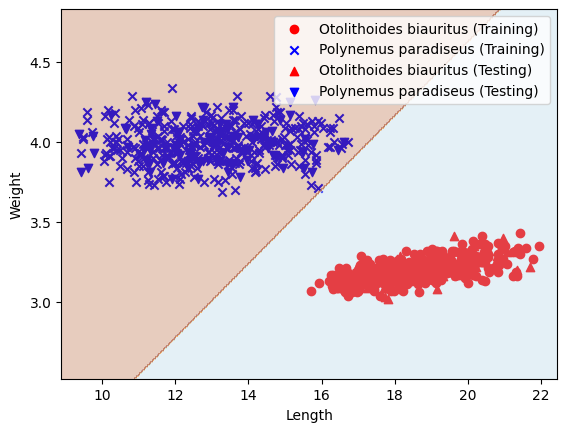

In [12]:
plt.scatter(train[train["species"]==0]["length"], train[train["species"]==0]["weight"], color='red', marker='o', label=f"{label1} (Training)")
plt.scatter(train[train["species"]==1]["length"], train[train["species"]==1]["weight"], color='blue', marker='x', label=f"{label2} (Training)")

plt.scatter(test[test["species"]==0]["length"], test[test["species"]==0]["weight"], color='red', marker='^', label=f"{label1} (Testing)")
plt.scatter(test[test["species"]==1]["length"], test[test["species"]==1]["weight"], color='blue', marker='v', label=f"{label2} (Testing)")

x_min, x_max = min(data["length"])-0.5, max(data["length"]+0.5)
y_min, y_max = min(data["weight"])-0.5, max(data["weight"]+0.5)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
all = np.c_[xx.ravel(), yy.ravel()]
z = np.asarray(perceptron.predict(all))
zz = z.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.3, cmap=plt.cm.Paired)
plt.legend()
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()